In [1]:
import pandas as pd        
import numpy as np         
from matplotlib import pyplot as plt   
import seaborn as sns      
from sklearn.model_selection import train_test_split  
from sklearn.impute import SimpleImputer             
from sklearn.preprocessing import StandardScaler     
from sklearn.pipeline import Pipeline               
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 
import joblib  


## Data Loading

In [4]:
df_clean = pd.read_csv("Lab_Test_Dataset_Clean.csv")
df_mistake = pd.read_csv("Lab_Test_Dataset_with_Mistakes.csv")
df_clean.head(3)


,Density (D4052),Sulfur High (D4294),Sulfur Middle (D4294),Sulfur Low (D4294),Flash Point (D93),Water KF ppm (D4928),Acid Number (D664),Mercaptan UOP163 ppm,Micro Carbon (D4530),Vapor Pressure (D6377)
0,0.8710,3.3607,0.4612,0.0870,66.8220,977.1339,2.6091,18.8327,10.3474,16.4296
1,0.8710,3.3540,0.4572,0.0872,71.8193,976.6509,2.0264,19.7751,10.4359,16.3439
2,0.8711,3.3322,0.4700,0.0875,71.2506,982.8546,2.7594,21.7075,10.7337,16.2717


In [5]:
df_mistake.head(3)

,Density (D4052),Sulfur High (D4294),Sulfur Middle (D4294),Sulfur Low (D4294),Flash Point (D93),Water KF ppm (D4928),Acid Number (D664),Mercaptan UOP163 ppm,Micro Carbon (D4530),Vapor Pressure (D6377)
0,0.8709,3.3458,0.4663,0.0852,52.7981,970.0970,2.4060,18.1418,102837.0000,21.7541
1,0.8709,3.3620,0.4762,0.0887,66.7789,1099.1826,2.4465,21.4067,9.1201,16.3783
2,0.8709,3.3306,0.4758,0.0871,71.9672,983.0894,2.8285,21.2208,10.2846,16.3127


In [6]:
df_clean.shape

(50, 10)

In [7]:
df_mistake.shape

(50, 10)

In [9]:
df_clean.columns = df_clean.columns.str.replace(" ","_").str.lower()
df_clean.head(3)

,density_(d4052),sulfur_high_(d4294),sulfur_middle_(d4294),sulfur_low_(d4294),flash_point_(d93),water_kf_ppm_(d4928),acid_number_(d664),mercaptan_uop163_ppm,micro_carbon_(d4530),vapor_pressure_(d6377)
0,0.8710,3.3607,0.4612,0.0870,66.8220,977.1339,2.6091,18.8327,10.3474,16.4296
1,0.8710,3.3540,0.4572,0.0872,71.8193,976.6509,2.0264,19.7751,10.4359,16.3439
2,0.8711,3.3322,0.4700,0.0875,71.2506,982.8546,2.7594,21.7075,10.7337,16.2717


In [10]:
df_mistake.columns = df_mistake.columns.str.replace(" ","_").str.lower()
df_mistake.head(3)

,density_(d4052),sulfur_high_(d4294),sulfur_middle_(d4294),sulfur_low_(d4294),flash_point_(d93),water_kf_ppm_(d4928),acid_number_(d664),mercaptan_uop163_ppm,micro_carbon_(d4530),vapor_pressure_(d6377)
0,0.8709,3.3458,0.4663,0.0852,52.7981,970.0970,2.4060,18.1418,102837.0000,21.7541
1,0.8709,3.3620,0.4762,0.0887,66.7789,1099.1826,2.4465,21.4067,9.1201,16.3783
2,0.8709,3.3306,0.4758,0.0871,71.9672,983.0894,2.8285,21.2208,10.2846,16.3127


In [11]:
# Add Labels
df_clean['Label'] = 0  # Normal
df_mistake['Label'] = 1  # Abnormal

# Combine datasets
df_all = pd.concat([df_clean, df_mistake], ignore_index=True)

# Look at the first 5 rows
print(df_all.head())

   density_(d4052)  sulfur_high_(d4294)  sulfur_middle_(d4294)  \
0           0.8710               3.3607                 0.4612   
1           0.8710               3.3540                 0.4572   
2           0.8711               3.3322                 0.4700   
3           0.8711               3.3550                 0.4621   
4           0.8710               3.3392                 0.4781   

   sulfur_low_(d4294)  flash_point_(d93)  water_kf_ppm_(d4928)  \
0              0.0870            66.8220              977.1339   
1              0.0872            71.8193              976.6509   
2              0.0875            71.2506              982.8546   
3              0.0887            70.2535              968.6193   
4              0.0892            68.6012              973.3003   

   acid_number_(d664)  mercaptan_uop163_ppm  micro_carbon_(d4530)  \
0              2.6091               18.8327               10.3474   
1              2.0264               19.7751               10.4359   

### Inspecting Data

In [12]:
df_all.shape

(100, 11)

In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   density_(d4052)         100 non-null    float64
 1   sulfur_high_(d4294)     100 non-null    float64
 2   sulfur_middle_(d4294)   100 non-null    float64
 3   sulfur_low_(d4294)      100 non-null    float64
 4   flash_point_(d93)       100 non-null    float64
 5   water_kf_ppm_(d4928)    100 non-null    float64
 6   acid_number_(d664)      100 non-null    float64
 7   mercaptan_uop163_ppm    100 non-null    float64
 8   micro_carbon_(d4530)    100 non-null    float64
 9   vapor_pressure_(d6377)  100 non-null    float64
 10  Label                   100 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 8.7 KB


In [14]:
df_all.describe()

,density_(d4052),sulfur_high_(d4294),sulfur_middle_(d4294),sulfur_low_(d4294),flash_point_(d93),water_kf_ppm_(d4928),acid_number_(d664),mercaptan_uop163_ppm,micro_carbon_(d4530),vapor_pressure_(d6377),Label
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.279674,3.379633,92.439461,8.767541,780.803660,1.975179e+05,2.398019,5893.289632,1038.805546,5081.260941,0.500000
std,122.430890,0.174420,647.065218,86.791158,7117.496387,1.382703e+06,0.495710,33677.733709,10282.645914,28025.542867,0.502519
min,0.870900,3.170700,0.421500,0.074300,46.663700,9.160998e+02,-0.369100,7.859900,8.857300,15.608400,0.000000
25%,0.870900,3.339800,0.457350,0.086575,66.991625,9.700829e+02,2.237500,18.789200,10.371400,16.266600,0.000000
50%,0.871000,3.357950,0.464250,0.087700,68.890950,9.774093e+02,2.408100,19.931300,10.528600,16.312450,0.500000
75%,0.871100,3.370375,0.473450,0.089900,70.847450,9.815422e+02,2.691575,21.297000,10.687000,16.390200,1.000000
max,871.000000,4.890900,4641.000000,868.000000,71244.000000,9.861864e+06,3.138100,217573.000000,102837.000000,164089.000000,1.000000


In [15]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
density_(d4052),100.0,18.279674,1.224309e+02,0.8709,0.870900,0.87100,0.871100,8.710000e+02
sulfur_high_(d4294),100.0,3.379633,1.744195e-01,3.1707,3.339800,3.35795,3.370375,4.890900e+00
sulfur_middle_(d4294),100.0,92.439461,6.470652e+02,0.4215,0.457350,0.46425,0.473450,4.641000e+03
sulfur_low_(d4294),100.0,8.767541,8.679116e+01,0.0743,0.086575,0.08770,0.089900,8.680000e+02
flash_point_(d93),100.0,780.803660,7.117496e+03,46.6637,66.991625,68.89095,70.847450,7.124400e+04
water_kf_ppm_(d4928),100.0,197517.865472,1.382703e+06,916.0998,970.082900,977.40935,981.542250,9.861864e+06
acid_number_(d664),100.0,2.398019,4.957097e-01,-0.3691,2.237500,2.40810,2.691575,3.138100e+00
mercaptan_uop163_ppm,100.0,5893.289632,3.367773e+04,7.8599,18.789200,19.93130,21.297000,2.175730e+05
micro_carbon_(d4530),100.0,1038.805546,1.028265e+04,8.8573,10.371400,10.52860,10.687000,1.028370e+05
vapor_pressure_(d6377),100.0,5081.260941,2.802554e+04,15.6084,16.266600,16.31245,16.390200,1.640890e+05


In [16]:
df_all.isna().sum()

density_(d4052)           0
sulfur_high_(d4294)       0
sulfur_middle_(d4294)     0
sulfur_low_(d4294)        0
flash_point_(d93)         0
water_kf_ppm_(d4928)      0
acid_number_(d664)        0
mercaptan_uop163_ppm      0
micro_carbon_(d4530)      0
vapor_pressure_(d6377)    0
Label                     0
dtype: int64

### Handle Missing Values


In [17]:
df_all.fillna(df_all.median(numeric_only=True), inplace=True)


### Handle Duplicates

In [18]:
# Count duplicate rows
duplicate_count = df_all.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [19]:
# Remove duplicate rows
df_all = df_all.drop_duplicates()

# Check again
print(f"Number of duplicate rows after removal: {df_all.duplicated().sum()}")


Number of duplicate rows after removal: 0


### Data Cleaning

In [22]:
numeric_columns = df_all.select_dtypes(include=['float64' , 'int64']).columns.drop('Label')
print(numeric_columns)

print(df_all[numeric_columns].describe())

Index(['density_(d4052)', 'sulfur_high_(d4294)', 'sulfur_middle_(d4294)',
       'sulfur_low_(d4294)', 'flash_point_(d93)', 'water_kf_ppm_(d4928)',
       'acid_number_(d664)', 'mercaptan_uop163_ppm', 'micro_carbon_(d4530)',
       'vapor_pressure_(d6377)'],
      dtype='object')
       density_(d4052)  sulfur_high_(d4294)  sulfur_middle_(d4294)  \
count       100.000000           100.000000             100.000000   
mean         18.279674             3.379633              92.439461   
std         122.430890             0.174420             647.065218   
min           0.870900             3.170700               0.421500   
25%           0.870900             3.339800               0.457350   
50%           0.871000             3.357950               0.464250   
75%           0.871100             3.370375               0.473450   
max         871.000000             4.890900            4641.000000   

       sulfur_low_(d4294)  flash_point_(d93)  water_kf_ppm_(d4928)  \
count          100

In [23]:
for col in numeric_columns:
    df_all[col] = df_all[col].abs()

### Flag Outside values expected ASTM / UOP methods


In [24]:
ranges = {
    "Density (D4052)": (0.8709, 0.8711),
    "Sulfur High (D4294)": (3.3231, 3.3865),
    "Sulfur Middle (D4294)": (0.4500, 0.4800),
    "Sulfur Low (D4294)": (0.0851, 0.0920),
    "Flash Point (D93)": (65.3, 72.1),
    "Water KF ppm (D4928)": (965.65, 986.33),
    "Acid Number (D664)": (2.0, 2.921),
    "Mercaptan UOP163 ppm": (18.0, 22.0),
    "Micro Carbon (D4530)": (10.205, 10.785),
    "Vapor Pressure (D6377)": (16.20, 16.45)
}

# Flag rows outside range
for col, (low, high) in ranges.items():
    if col in df_all.columns:
        df_all[col + '_flag'] = (~df_all[col].between(low, high)).astype(int)
        print(f"{col}: {df_all[col + '_flag'].sum()} suspicious values")


### Decimal Errors

In [26]:
print(df_all.columns.tolist())


['density_(d4052)', 'sulfur_high_(d4294)', 'sulfur_middle_(d4294)', 'sulfur_low_(d4294)', 'flash_point_(d93)', 'water_kf_ppm_(d4928)', 'acid_number_(d664)', 'mercaptan_uop163_ppm', 'micro_carbon_(d4530)', 'vapor_pressure_(d6377)', 'Label']


In [28]:
df_all.columns = df_all.columns.str.strip().str.replace(' ','_').str.replace('(','').str.replace(')','').str.lower()
print(df_all.columns.tolist())


['density_d4052', 'sulfur_high_d4294', 'sulfur_middle_d4294', 'sulfur_low_d4294', 'flash_point_d93', 'water_kf_ppm_d4928', 'acid_number_d664', 'mercaptan_uop163_ppm', 'micro_carbon_d4530', 'vapor_pressure_d6377', 'label']


In [29]:
# Apply decimal fix to Micro Carbon
fixed_values = []
for idx, val in df_all['micro_carbon_d4530'].items():
    new_val, changed = fix_decimal_typo(val, 10.205, 10.785)
    fixed_values.append(new_val)

df_all['micro_carbon_d4530'] = fixed_values


In [30]:
ranges = {
    "density_d4052": (0.8709, 0.8711),
    "sulfur_high_d4294": (3.3231, 3.3865),
    "sulfur_middle_d4294": (0.4500, 0.4800),
    "sulfur_low_d4294": (0.0851, 0.0920),
    "flash_point_d93": (65.3, 72.1),
    "water_kf_ppm_d4928": (965.65, 986.33),
    "acid_number_d664": (2.0, 2.921),
    "mercaptan_uop163_ppm": (18.0, 22.0),
    "micro_carbon_d4530": (10.205, 10.785),
    "vapor_pressure_d6377": (16.20, 16.45)
}

# Create flags for suspicious values
for col, (low, high) in ranges.items():
    if col in df_all.columns:
        df_all[col + '_flag'] = (~df_all[col].between(low, high)).astype(int)
        print(f"{col}: {df_all[col + '_flag'].sum()} suspicious values")


density_d4052: 4 suspicious values
sulfur_high_d4294: 5 suspicious values
sulfur_middle_d4294: 6 suspicious values
sulfur_low_d4294: 6 suspicious values
flash_point_d93: 6 suspicious values
water_kf_ppm_d4928: 7 suspicious values
acid_number_d664: 4 suspicious values
mercaptan_uop163_ppm: 8 suspicious values
micro_carbon_d4530: 4 suspicious values
vapor_pressure_d6377: 10 suspicious values


In [31]:
def fix_decimal_typo(val, low, high):
    if pd.isna(val):
        return val, False
    v = float(val)
    attempts = 0
    while v > high and attempts < 6:
        v = v / 10
        attempts += 1
        if low <= v <= high:
            return round(v, 4), True
    return val, False

# Apply to Micro Carbon as example
if 'micro_carbon_d4530' in df_all.columns:
    fixed_values = []
    for idx, val in df_all['micro_carbon_d4530'].items():
        new_val, changed = fix_decimal_typo(val, 10.205, 10.785)
        fixed_values.append(new_val)
    df_all['micro_carbon_d4530'] = fixed_values


### Replace Flagged Values with NaN

In [32]:
for col in ranges.keys():
    flag_col = col + '_flag'
    if flag_col in df_all.columns:
        df_all.loc[df_all[flag_col]==1, col] = np.nan


In [33]:
print(df_all[numeric_columns].describe())
print(df_all.isna().sum())


KeyError: "['density_(d4052)', 'sulfur_high_(d4294)', 'sulfur_middle_(d4294)', 'sulfur_low_(d4294)', 'flash_point_(d93)', 'water_kf_ppm_(d4928)', 'acid_number_(d664)', 'micro_carbon_(d4530)', 'vapor_pressure_(d6377)'] not in index"

In [34]:
# After cleaning column names
numeric_columns = df_all.select_dtypes(include=['float64','int64']).columns.drop('label')
print(numeric_columns)


Index(['density_d4052', 'sulfur_high_d4294', 'sulfur_middle_d4294',
       'sulfur_low_d4294', 'flash_point_d93', 'water_kf_ppm_d4928',
       'acid_number_d664', 'mercaptan_uop163_ppm', 'micro_carbon_d4530',
       'vapor_pressure_d6377', 'density_d4052_flag', 'sulfur_high_d4294_flag',
       'sulfur_middle_d4294_flag', 'sulfur_low_d4294_flag',
       'flash_point_d93_flag', 'water_kf_ppm_d4928_flag',
       'acid_number_d664_flag', 'mercaptan_uop163_ppm_flag',
       'micro_carbon_d4530_flag', 'vapor_pressure_d6377_flag'],
      dtype='object')


In [35]:
print(df_all[numeric_columns].describe())
print(df_all.isna().sum())


       density_d4052  sulfur_high_d4294  sulfur_middle_d4294  \
count      96.000000          95.000000            94.000000   
mean        0.870996           3.356208             0.464343   
std         0.000071           0.017892             0.008709   
min         0.870900           3.324100             0.450400   
25%         0.870900           3.340150             0.457250   
50%         0.871000           3.357800             0.464050   
75%         0.871000           3.369650             0.472575   
max         0.871100           3.386500             0.479500   

       sulfur_low_d4294  flash_point_d93  water_kf_ppm_d4928  \
count         94.000000        94.000000           93.000000   
mean           0.088183        68.812886          976.224806   
std            0.001972         2.010737            5.986536   
min            0.085100        65.306500          965.665200   
25%            0.086600        67.047225          971.331200   
50%            0.087700        68.87985

### Univariate Analysis 


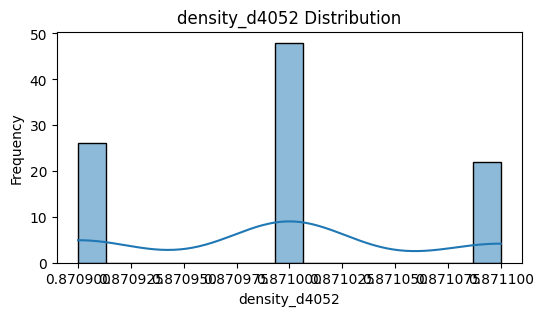

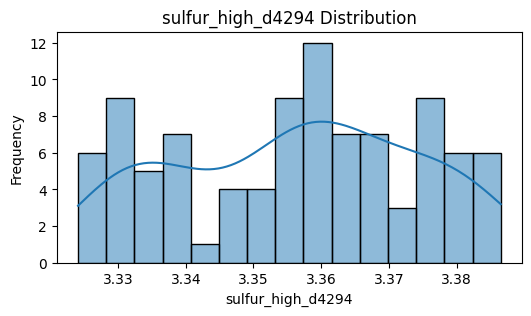

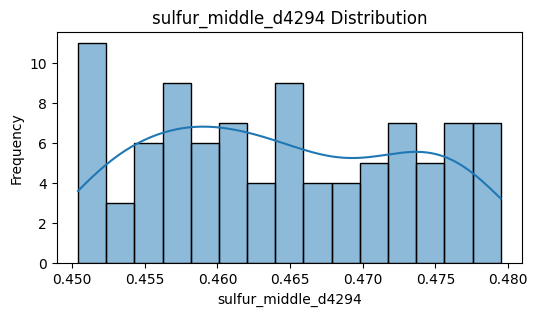

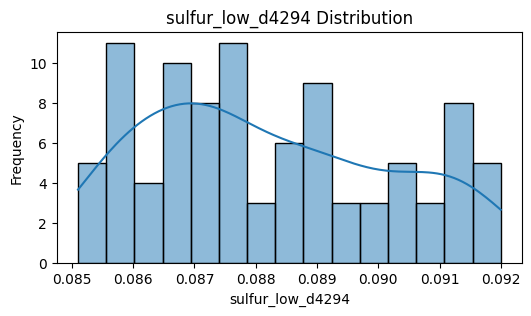

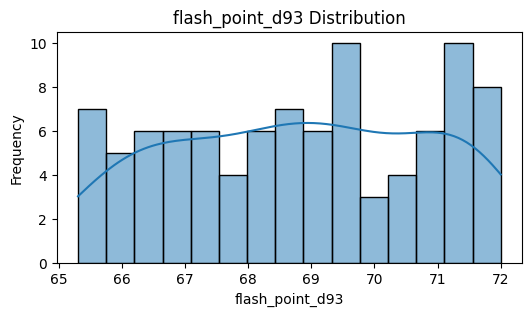

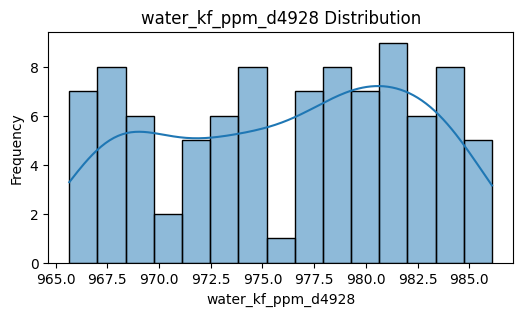

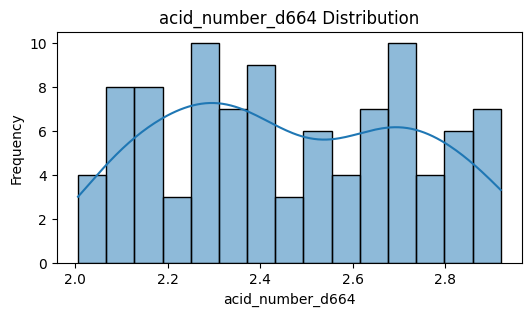

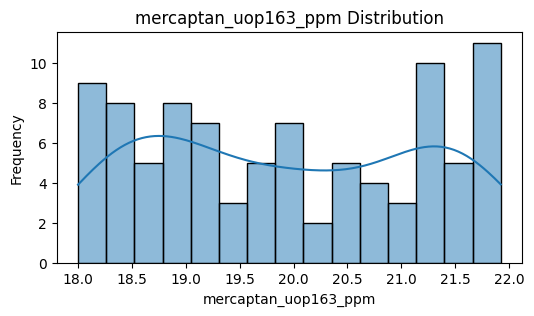

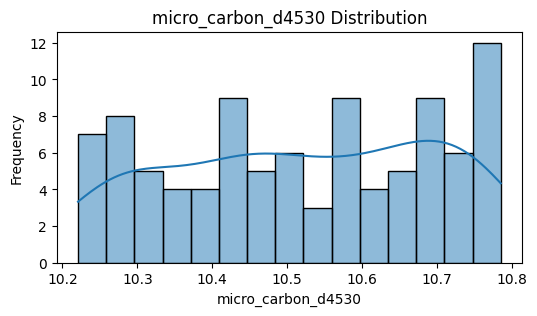

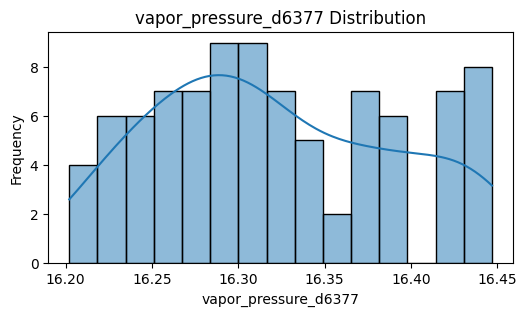

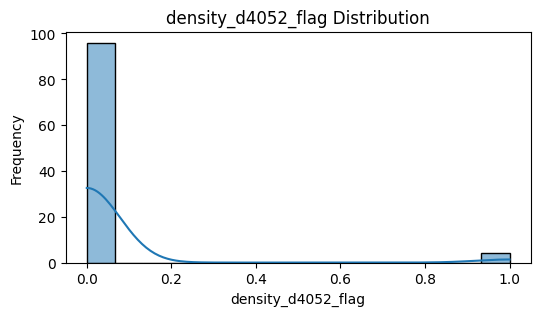

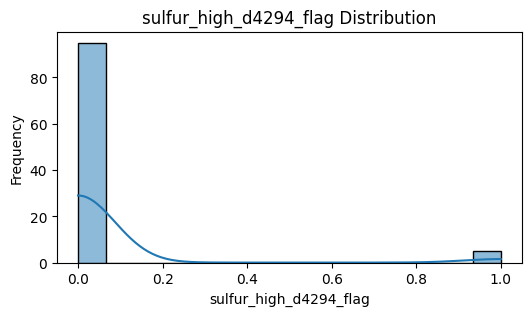

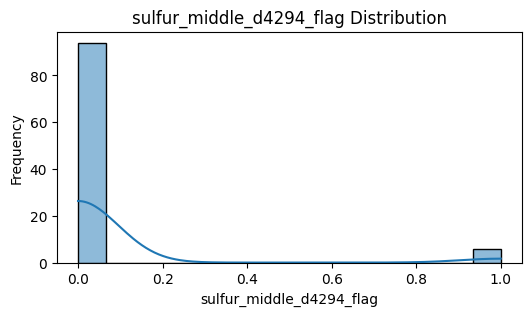

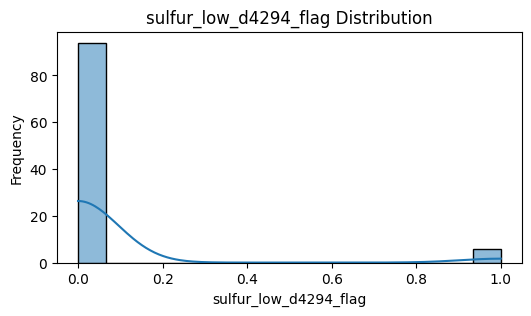

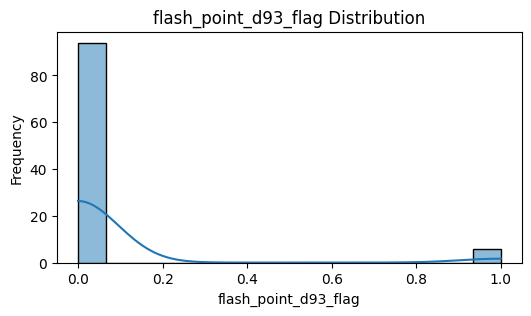

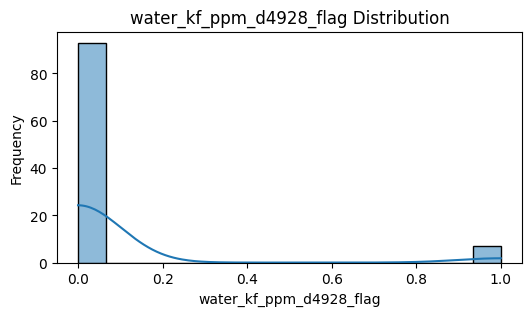

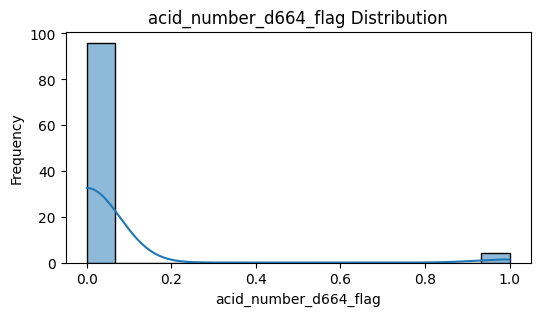

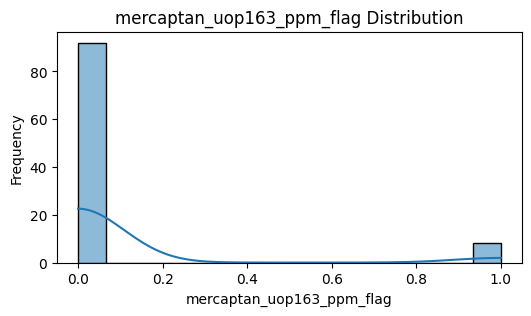

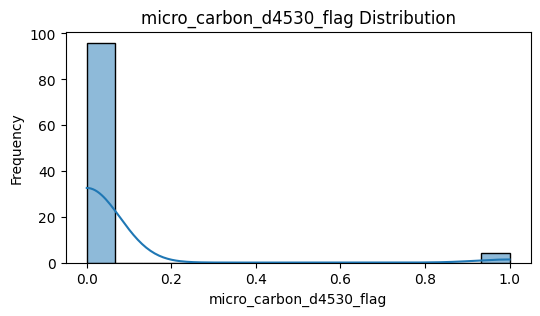

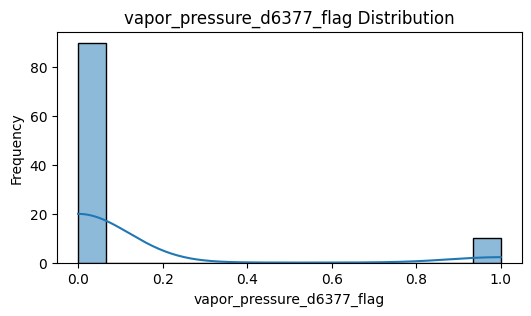

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_columns:
    plt.figure(figsize=(6,3))
    sns.histplot(df_all[col], kde=True, bins=15)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


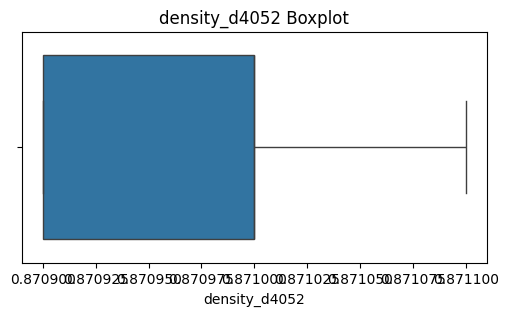

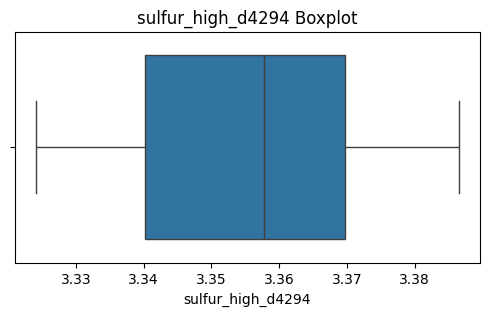

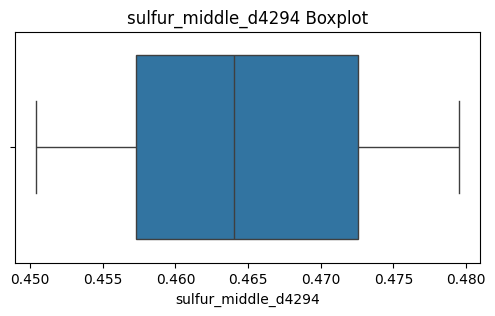

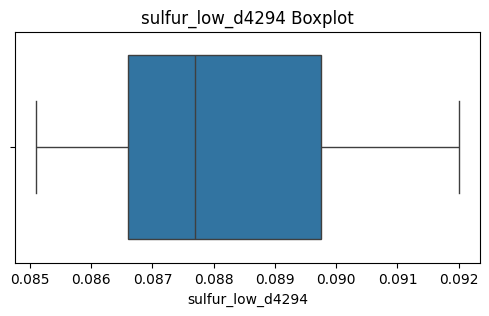

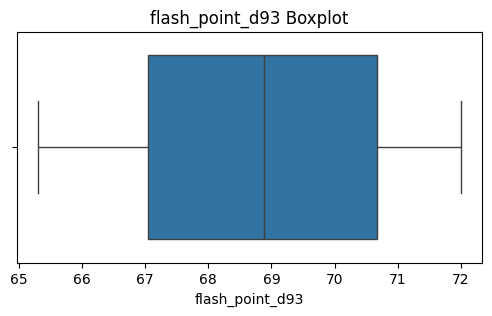

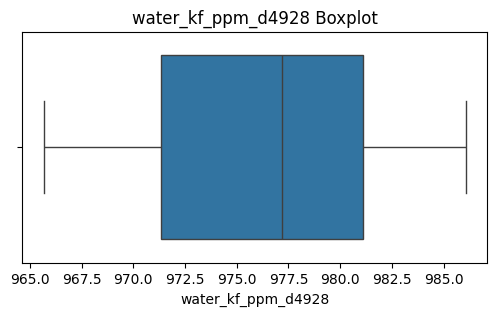

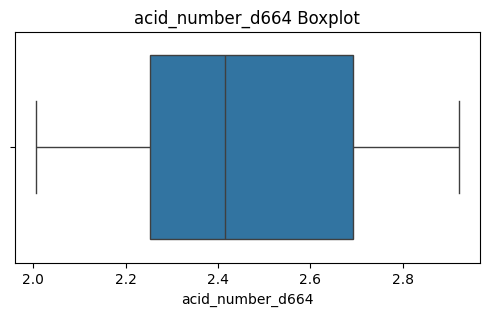

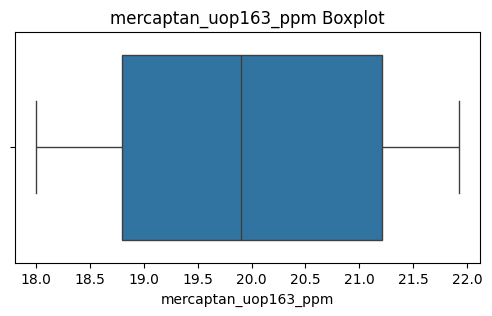

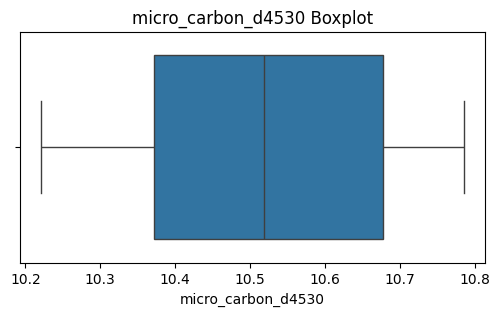

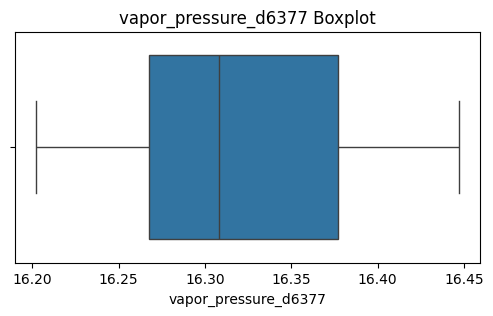

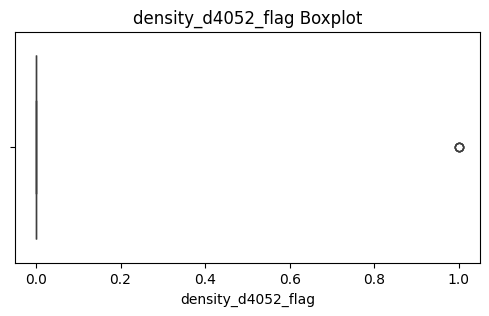

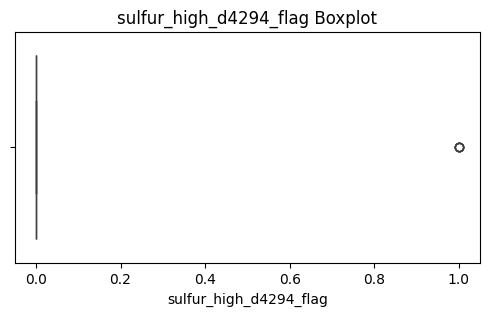

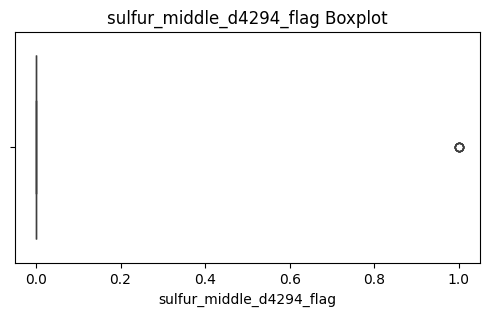

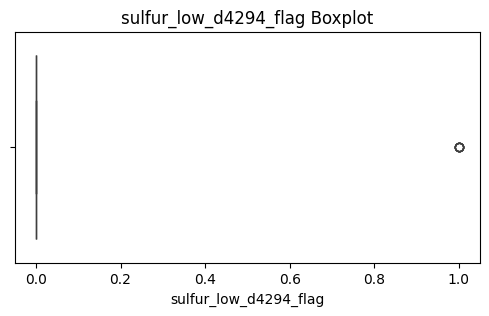

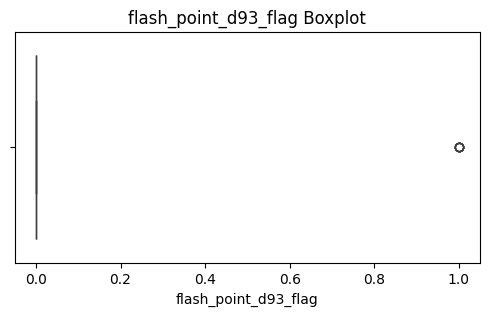

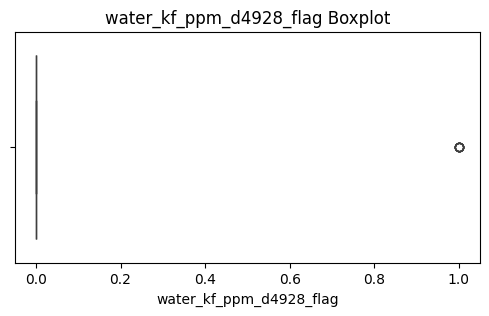

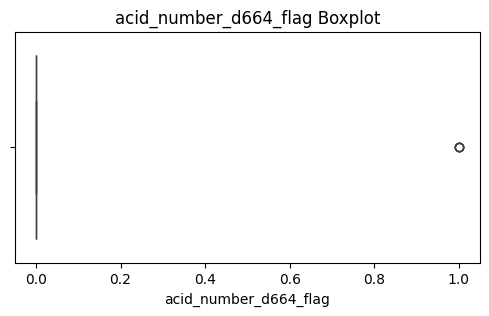

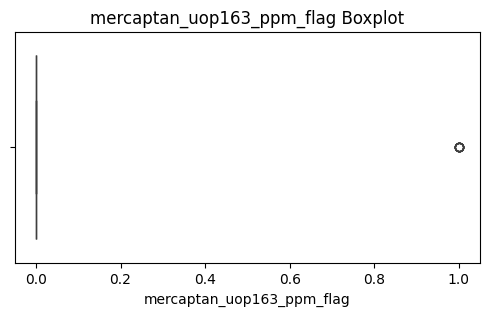

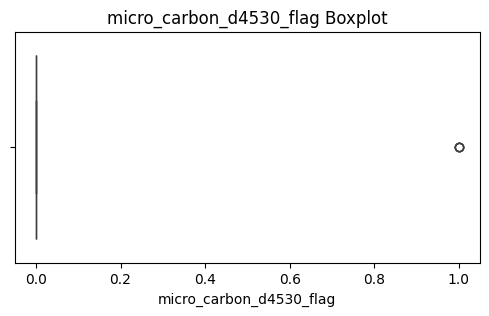

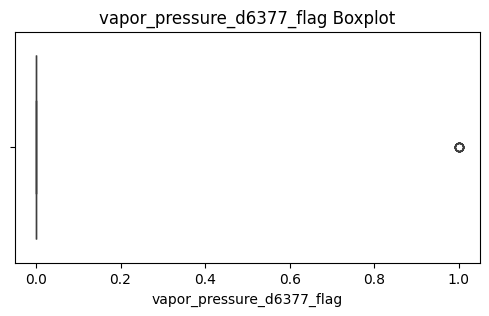

In [37]:
for col in numeric_columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_all[col])
    plt.title(f'{col} Boxplot')
    plt.show()


### Check Missing Values / Flags

In [38]:
for col in numeric_columns:
    missing_count = df_all[col].isna().sum()
    print(f"{col}: {missing_count} missing values")


density_d4052: 4 missing values
sulfur_high_d4294: 5 missing values
sulfur_middle_d4294: 6 missing values
sulfur_low_d4294: 6 missing values
flash_point_d93: 6 missing values
water_kf_ppm_d4928: 7 missing values
acid_number_d664: 4 missing values
mercaptan_uop163_ppm: 8 missing values
micro_carbon_d4530: 4 missing values
vapor_pressure_d6377: 10 missing values
density_d4052_flag: 0 missing values
sulfur_high_d4294_flag: 0 missing values
sulfur_middle_d4294_flag: 0 missing values
sulfur_low_d4294_flag: 0 missing values
flash_point_d93_flag: 0 missing values
water_kf_ppm_d4928_flag: 0 missing values
acid_number_d664_flag: 0 missing values
mercaptan_uop163_ppm_flag: 0 missing values
micro_carbon_d4530_flag: 0 missing values
vapor_pressure_d6377_flag: 0 missing values


In [39]:
summary_stats = df_all[numeric_columns].describe().T
summary_stats['missing'] = df_all[numeric_columns].isna().sum()
summary_stats



,count,mean,std,min,25%,50%,75%,max,missing
density_d4052,96.0,0.870996,0.000071,0.8709,0.870900,0.87100,0.871000,0.8711,4
sulfur_high_d4294,95.0,3.356208,0.017892,3.3241,3.340150,3.35780,3.369650,3.3865,5
sulfur_middle_d4294,94.0,0.464343,0.008709,0.4504,0.457250,0.46405,0.472575,0.4795,6
sulfur_low_d4294,94.0,0.088183,0.001972,0.0851,0.086600,0.08770,0.089750,0.0920,6
flash_point_d93,94.0,68.812886,2.010737,65.3065,67.047225,68.87985,70.677700,71.9998,6
water_kf_ppm_d4928,93.0,976.224806,5.986536,965.6652,971.331200,977.18850,981.092700,986.0944,7
acid_number_d664,96.0,2.462203,0.266898,2.0063,2.253925,2.41410,2.691575,2.9206,4
mercaptan_uop163_ppm,92.0,19.934515,1.262728,18.0015,18.798850,19.89890,21.211650,21.9216,8
micro_carbon_d4530,96.0,10.520296,0.173957,10.2208,10.371400,10.51905,10.677475,10.7850,4
vapor_pressure_d6377,90.0,16.321250,0.069689,16.2021,16.267575,16.30835,16.377275,16.4469,10


### Bivariate Analysis

In [40]:
target_col = 'label'


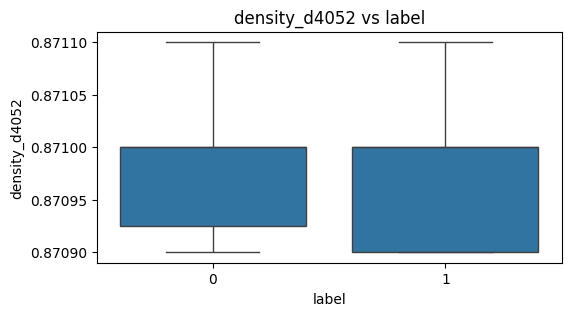

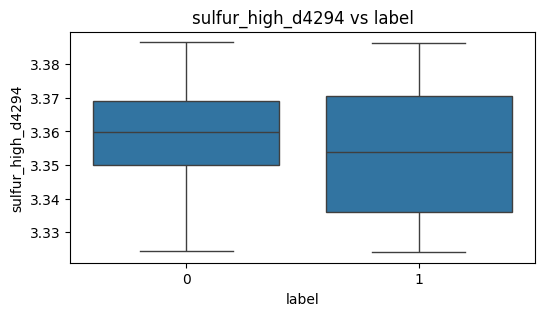

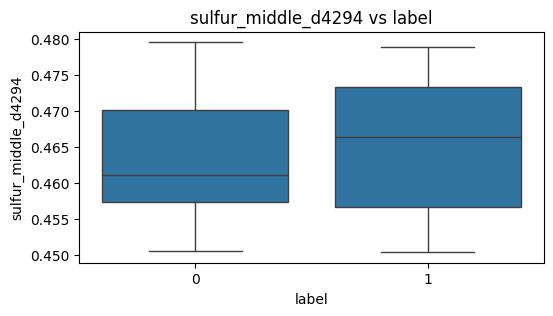

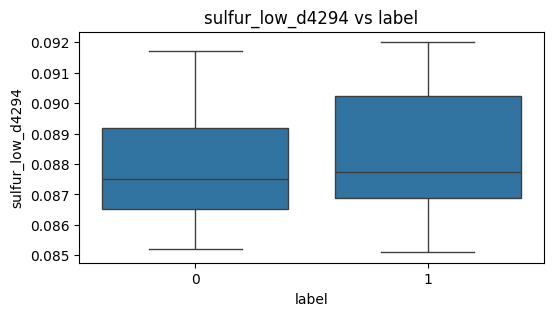

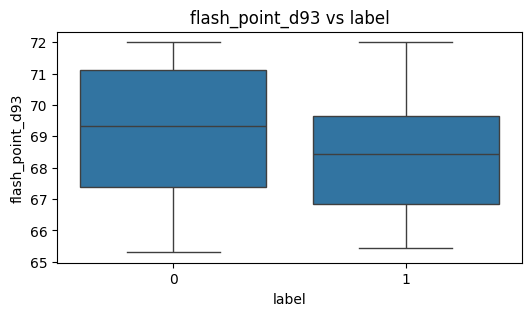

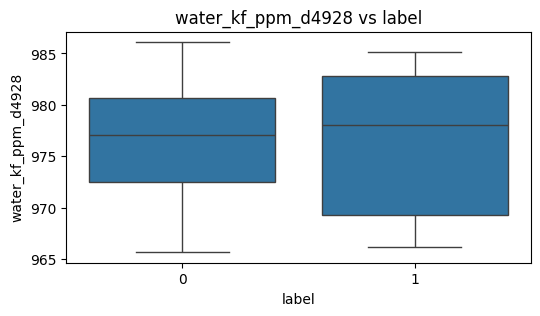

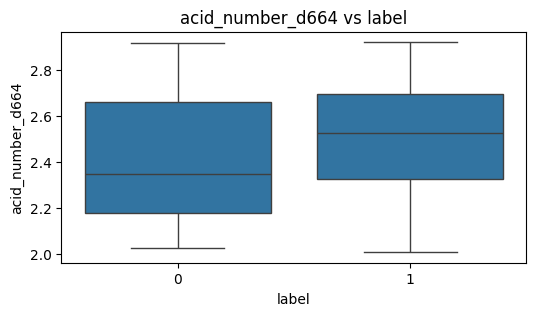

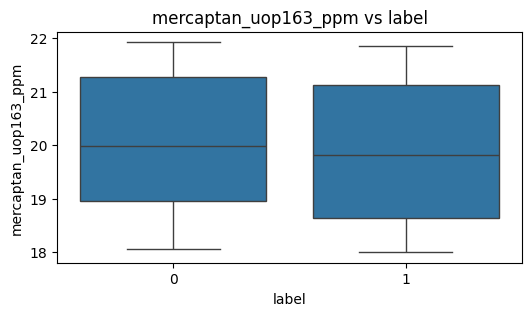

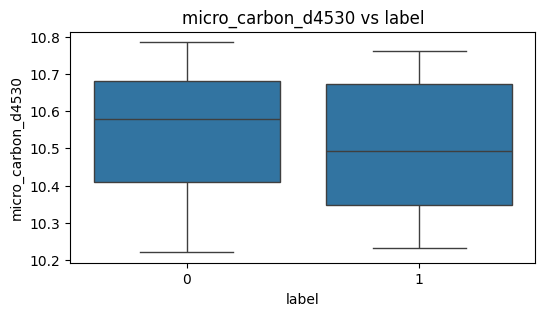

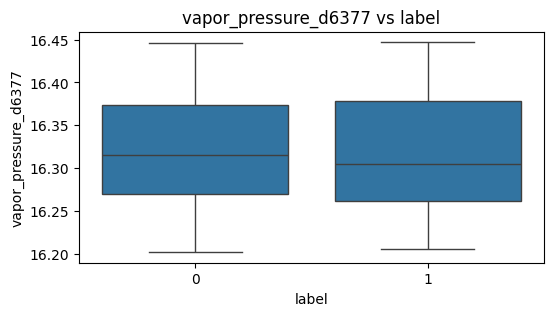

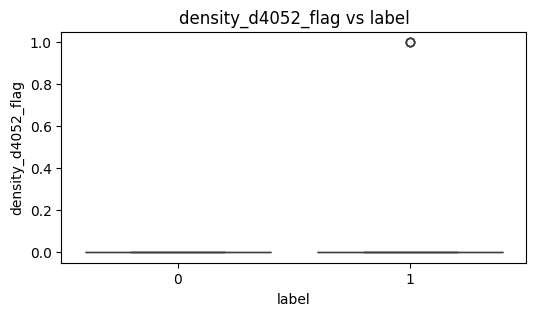

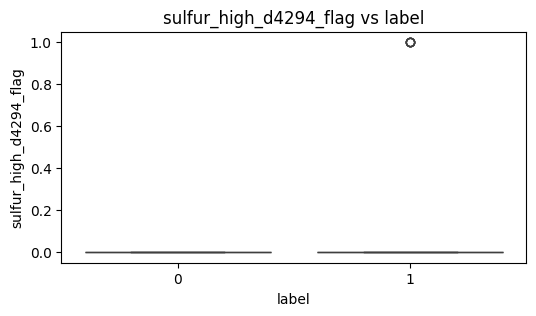

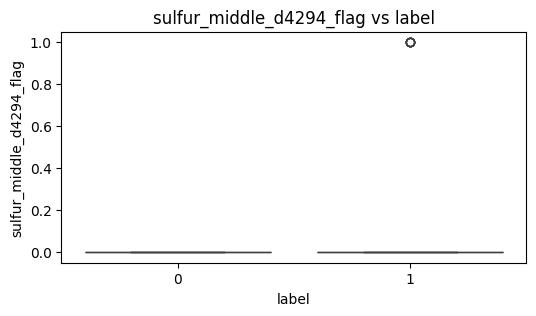

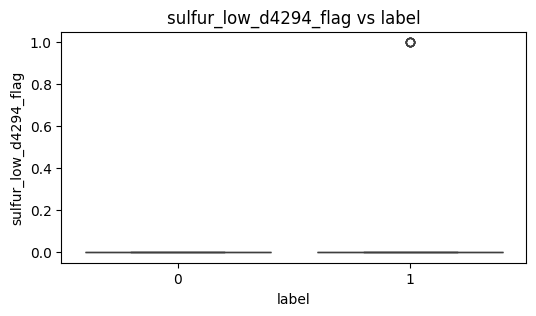

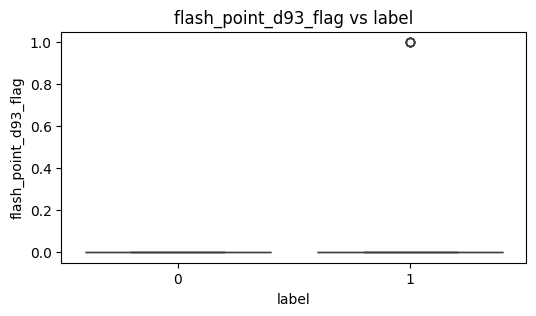

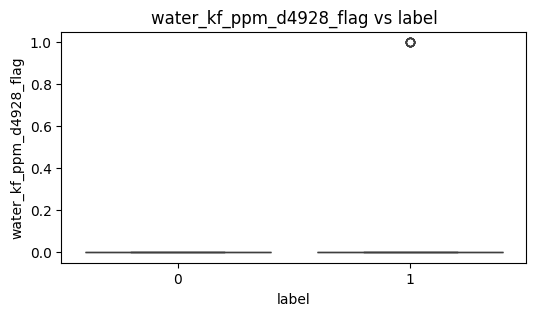

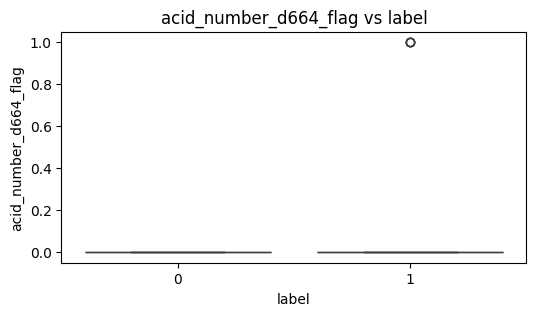

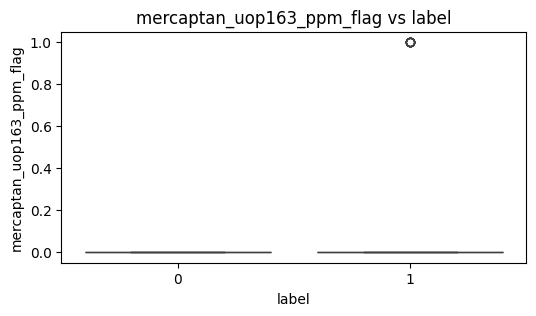

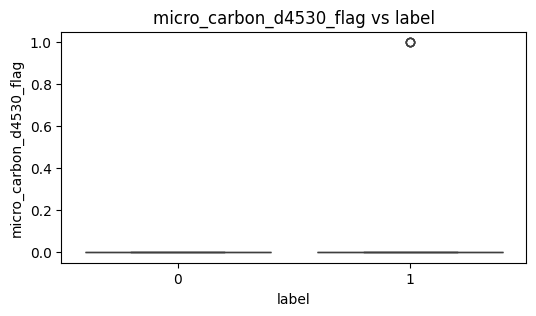

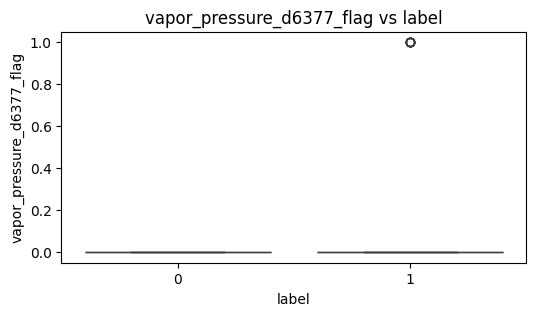

In [41]:
for col in numeric_columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_all[target_col], y=df_all[col])
    plt.title(f'{col} vs {target_col}')
    plt.xlabel(target_col)
    plt.ylabel(col)
    plt.show()


### Correlation Heatmap

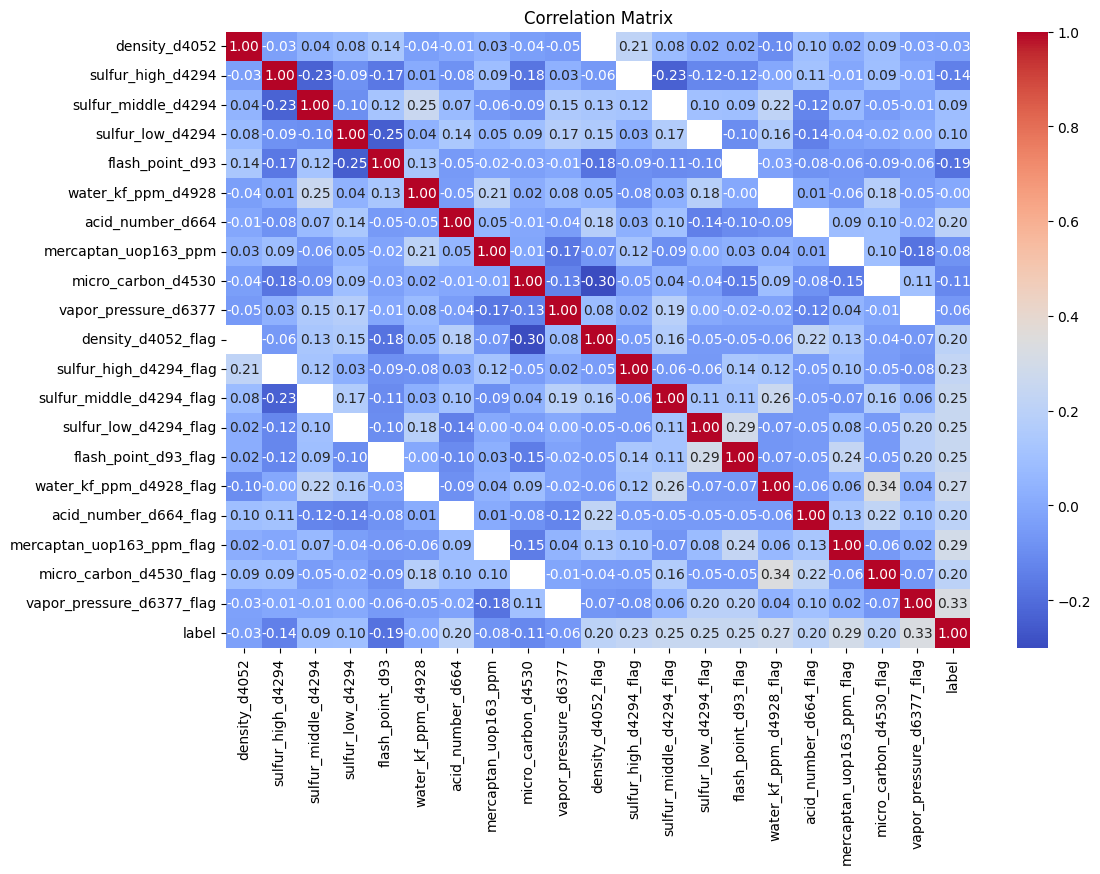

In [42]:
# Include label in correlation
correlation_matrix = df_all[numeric_columns.tolist() + [target_col]].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Count of Abnormal vs Normal

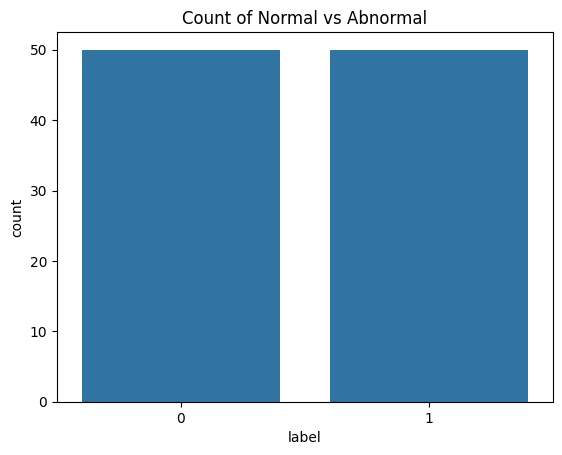

In [43]:
sns.countplot(x=df_all[target_col])
plt.title('Count of Normal vs Abnormal')
plt.show()


### Prepare Features and Target

In [44]:
# Features (all numeric lab columns)
X = df_all[numeric_columns]

# Target
y = df_all['label']


### Handle Missing Values

In [45]:
X = X.fillna(X.median())



### Split Data into Train and Test Sets

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Train a Simple Model (Logistic Regression)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
model = LogisticRegression(max_iter=1000)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


### Evaluate Model

In [48]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8
Confusion Matrix:
 [[8 2]
 [2 8]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



### Feature Engineering

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = numeric_features from earlier

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()



In [50]:
# Example: Sulfur ratio
X_scaled['sulfur_high_low_ratio'] = X_scaled['sulfur_high_d4294'] / (X_scaled['sulfur_low_d4294'] + 1e-6)

# Example: Density * Flash Point interaction
X_scaled['density_flash_interaction'] = X_scaled['density_d4052'] * X_scaled['flash_point_d93']

X_scaled.head()


,density_d4052,sulfur_high_d4294,sulfur_middle_d4294,sulfur_low_d4294,flash_point_d93,water_kf_ppm_d4928,acid_number_d664,mercaptan_uop163_ppm,micro_carbon_d4530,vapor_pressure_d6377,...,sulfur_middle_d4294_flag,sulfur_low_d4294_flag,flash_point_d93_flag,water_kf_ppm_d4928_flag,acid_number_d664_flag,mercaptan_uop163_ppm_flag,micro_carbon_d4530_flag,vapor_pressure_d6377_flag,sulfur_high_low_ratio,density_flash_interaction
0,0.057831,0.254286,-0.372082,-0.605569,-1.028752,0.146439,0.571706,-0.912305,-1.019425,1.664776,...,-0.252646,-0.252646,-0.252646,-0.274352,-0.204124,-0.294884,-0.204124,-0.333333,-0.419913,-0.059494
1,0.057831,-0.131869,-0.848347,-0.500618,1.548305,0.062400,-1.666775,-0.129973,-0.497463,0.363506,...,-0.252646,-0.252646,-0.252646,-0.274352,-0.204124,-0.294884,-0.204124,-0.333333,0.263413,0.089541
2,1.503619,-1.388313,0.675701,-0.343191,1.255033,1.141803,1.149093,1.474205,1.258926,-0.732781,...,-0.252646,-0.252646,-0.252646,-0.274352,-0.204124,-0.294884,-0.204124,-0.333333,4.045321,1.887091
3,1.503619,-0.074234,-0.264922,0.286517,0.740838,-1.335045,1.726864,1.615247,-0.257419,-1.660525,...,-0.252646,-0.252646,-0.252646,-0.274352,-0.204124,-0.294884,-0.204124,-0.333333,-0.259090,1.113938
4,0.057831,-0.984868,1.640138,0.548895,-0.111236,-0.520582,0.817566,-1.478549,1.456505,-0.829959,...,-0.252646,-0.252646,-0.252646,-0.274352,-0.204124,-0.294884,-0.204124,-0.333333,-1.794269,-0.006433


### Feature Selection

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Use Random Forest to check feature importance
rf = RandomForestClassifier()
rf.fit(X_scaled, y)  # y = target
importance = pd.Series(rf.feature_importances_, index=X_scaled.columns)
importance.sort_values(ascending=False)


acid_number_d664             0.106020
sulfur_high_d4294            0.086805
flash_point_d93              0.083453
water_kf_ppm_d4928           0.080286
sulfur_middle_d4294          0.077210
micro_carbon_d4530           0.075371
mercaptan_uop163_ppm         0.069281
vapor_pressure_d6377         0.066906
density_flash_interaction    0.065594
sulfur_high_low_ratio        0.058978
sulfur_low_d4294             0.055735
vapor_pressure_d6377_flag    0.035595
water_kf_ppm_d4928_flag      0.027150
mercaptan_uop163_ppm_flag    0.024205
sulfur_low_d4294_flag        0.017181
sulfur_middle_d4294_flag     0.015840
sulfur_high_d4294_flag       0.013548
acid_number_d664_flag        0.010653
flash_point_d93_flag         0.010383
density_d4052                0.008012
micro_carbon_d4530_flag      0.007739
density_d4052_flag           0.004056
dtype: float64

In [52]:
X_scaled.to_csv("lab_features_engineered.csv", index=False)


### Prepare Features and Target

In [53]:
# Features = engineered numeric columns
X = X_scaled.copy()  # from Feature Engineering step
y = df_all['label']  # target column


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.85
Confusion Matrix:
 [[10  0]
 [ 3  7]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



In [56]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)


Random Forest Accuracy: 0.65
Confusion Matrix:
 [[8 2]
 [5 5]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.71      0.50      0.59        10

    accuracy                           0.65        20
   macro avg       0.66      0.65      0.64        20
weighted avg       0.66      0.65      0.64        20



flash_point_d93              0.101767
sulfur_middle_d4294          0.100771
acid_number_d664             0.087983
micro_carbon_d4530           0.080860
sulfur_high_d4294            0.078470
water_kf_ppm_d4928           0.078065
vapor_pressure_d6377         0.072390
density_flash_interaction    0.071555
sulfur_high_low_ratio        0.064566
sulfur_low_d4294             0.063974
mercaptan_uop163_ppm         0.057446
mercaptan_uop163_ppm_flag    0.021489
sulfur_low_d4294_flag        0.018951
sulfur_high_d4294_flag       0.016155
vapor_pressure_d6377_flag    0.015538
density_d4052                0.014814
flash_point_d93_flag         0.013506
acid_number_d664_flag        0.011136
water_kf_ppm_d4928_flag      0.010579
sulfur_middle_d4294_flag     0.008743
micro_carbon_d4530_flag      0.006164
density_d4052_flag           0.005080
dtype: float64

In [57]:
from sklearn.svm import SVC

# Train model
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.85
Confusion Matrix:
 [[10  0]
 [ 3  7]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



In [60]:
import os

# Create the folder if it doesn't exist
os.makedirs("data", exist_ok=True)

# Now save your cleaned and engineered datasets
df_all.to_csv("data/lab_dataset_cleaned.csv", index=False)
X_scaled.to_csv("data/lab_features_engineered.csv", index=False)

print("Files saved successfully in the 'data/' folder!")


Files saved successfully in the 'data/' folder!


In [61]:
# Save cleaned dataset
df_all.to_csv("data/lab_dataset_cleaned.csv", index=False)

# Save engineered features
X_scaled.to_csv("data/lab_features_engineered.csv", index=False)


In [58]:
### Trained Logistic Regression, Random Forest, and SVM

### Evaluated all models using accuracy, confusion matrix, and classification report

### Identified important features (from Random Forest)